In [310]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

In [311]:

def integrate(x: np.array, y: np.array) -> float:
    return np.sum((x[1:] - x[:-1]) * (y[1:] + y[:-1])/2)

x = np.linspace(0, 1, 100)
y = 10 * x + 2
print(integrate(x, y))

7.000000000000001


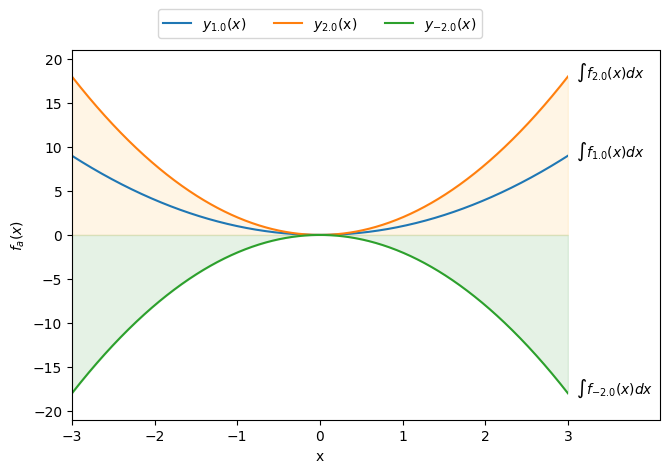

In [312]:
def generate_graph(a: List[float], show_figure: bool = False, save_path: str | None=None):
    x = np.linspace(-3, 3, 1000)
    y = a[0] * x**2
    y1 = a[1] * x**2
    y2 = a[2] * x**2
    u, v, w = [t* x**2 for t in a]
    fig, ax = plt.subplots()
    plt.plot(x, u, label=f'$y_{{{a[0]}}}(x)$')
    plt.plot(x, v, label=f'$y_{{{a[1]}}}$(x)')
    plt.plot(x, w, label=f'$y_{{{a[2]}}}(x)$')
    plt.fill_between(x, v, color='orange', alpha=0.1)
    plt.fill_between(x, w, color='green', alpha=0.1)
    plt.xlim(-3,3)
    plt.ylim(-21,21)
    plt.xlabel('x')
    plt.ylabel(r'$f_a(x)$')
    plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(.5, 1.13))

    plt.text(3.1, 9, f'$\int f_{{{a[0]}}}(x)dx$')
    plt.text(3.1, 18, f'$\int f_{{{a[1]}}}(x)dx$')
    plt.text(3.1, -18, f'$\int f_{{{a[2]}}}(x)dx$')
    ax.spines["top"].set_bounds(-3, 4.1)
    ax.spines["bottom"].set_bounds(-3, 4.1)
    ax.spines["right"].set_position(('outward', 66))
    if show_figure:
        plt.show()
    if save_path:
        plt.savefig(save_path)

generate_graph([1.0, 2.0, -2.0])


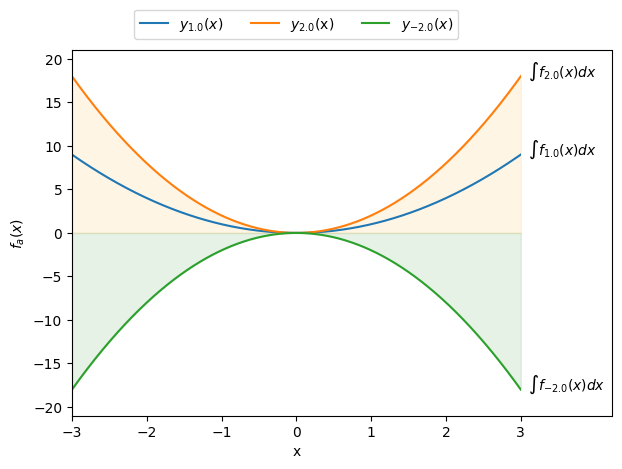

In [313]:
def generate_graph(a: List[float], show_figure: bool = False, save_path: str | None=None):
    x = np.linspace(-3, 3, 1000)
    y = a[0] * x**2
    y1 = a[1] * x**2
    y2 = a[2] * x**2
    u, v, w = [t* x**2 for t in a]
    fig, ax = plt.subplots()
    ax.plot(x, u, label=f'$y_{{{a[0]}}}(x)$')
    ax.plot(x, v, label=f'$y_{{{a[1]}}}$(x)')
    ax.plot(x, w, label=f'$y_{{{a[2]}}}(x)$')
    ax.fill_between(x, v, color='orange', alpha=0.1)
    ax.fill_between(x, w, color='green', alpha=0.1)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-21, 21)
    ax.set_xlabel('x')
    ax.set_ylabel(r'$f_a(x)$')
    ax.legend(loc='upper center', ncol=3, bbox_to_anchor=(.5, 1.13))
    ax.text(3.1, 9, f'$\int f_{{{a[0]}}}(x)dx$')
    ax.text(3.1, 18, f'$\int f_{{{a[1]}}}(x)dx$')
    ax.text(3.1, -18, f'$\int f_{{{a[2]}}}(x)dx$')
    ax.spines["top"].set_bounds(-3, 4.2)
    ax.spines["bottom"].set_bounds(-3, 4.2)
    ax.spines["right"].set_position(('outward', 66))
    fig.tight_layout()
    if show_figure:
        fig.show()
    if save_path:
        fig.savefig(save_path)

generate_graph([1.0, 2.0, -2.0])

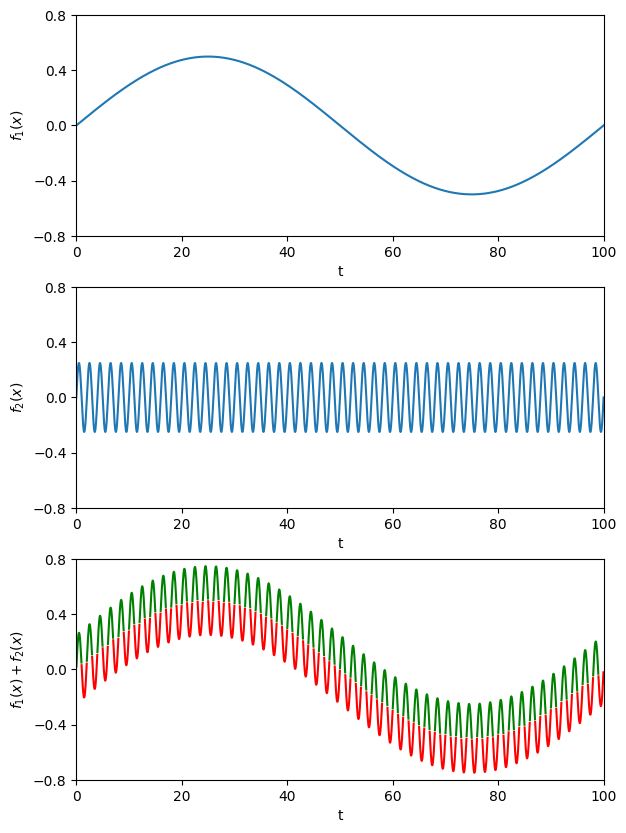

In [314]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

def generate_sinus(show_figure: bool=False, save_path: str | None=None):
    t = np.linspace(0, 100, 4000)
    f1 = 0.5 * np.sin((np.pi * t) / 50)
    f2 = 0.25 * np.sin(np.pi * t)
    plt.figure(figsize=(6,8), frameon=True)
    plt.subplot(311)
    plt.tight_layout(h_pad=2)
    plt.plot(t, f1)
    plt.yticks(np.arange(-0.8, 0.81, step=0.4))
    plt.xlim(0, 100)
    plt.xlabel('t')
    plt.ylabel('$f_1(x)$')

    plt.subplot(312)
    plt.plot(t, f2)
    plt.yticks(np.arange(-0.8, 0.81, step=0.4))
    plt.xlim(0, 100)
    plt.xlabel('t')
    plt.ylabel('$f_2(x)$')

    plt.subplot(313)
    plt.ylim(-0.8, 0.8)
    plt.yticks(np.arange(-0.8, 0.81, step=0.4))
    plt.xlim(0, 100)
    f12 = f1 + f2
    upper = np.where(f1+f2>f1, f12, None)
    lower = np.where(f1+f2<f1, f12, None)
    plt.plot(t, upper, color='green')
    plt.plot(t, lower, color='red')
    plt.xlabel('t')
    plt.ylabel('$f_1(x)+f_2(x)$')
    if show_figure:
        plt.show()
    if save_path:
        plt.savefig(save_path)
 
generate_sinus()


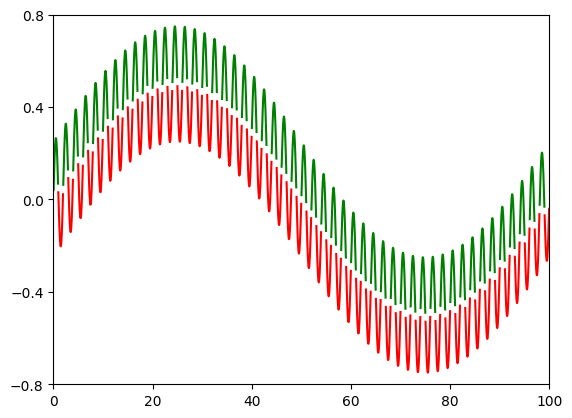

In [315]:
t = np.linspace(0, 100, 2000)
f1 = 0.5 * np.sin((np.pi * t) / 50)
f2 = 0.25 * np.sin(np.pi * t)
f12 = f1 + f2
neg = f1 + f2 > f1

f3 = f12.copy()
f3[~neg] = np.nan
plt.ylim(-0.8, 0.8)
plt.yticks(np.arange(-0.8, 0.81, step=0.4))
plt.xlim(0, 100)
plt.plot(t, f3, color='green')
f3 = f12.copy()
f3[neg] = np.nan
plt.plot(t, f3, color="red")



In [316]:
def download_data(url="https://ehw.fit.vutbr.cz/izv/temp.html"):
    site = requests.get(url)
    soup = BeautifulSoup(site.text, 'xml')
    data = [{"year": int(row.find_all("p")[0].text),
            "month": int(row.find_all("p")[1].text),
            "temp": np.array([float(x.text.replace(',','.')) for x in row.find_all("p")[2:]])}
            for row in soup.find_all('tr')]
    print(data[0])
    # print(soup.find_all('tr')[1].find_all('p')[0].text.strip())
    # print(soup.prettify())
    # print(soup.body.div.div.table.tr.td.text)
    out = []
    rows = soup.find_all('tr') 
    for row in rows:
        row = row.find_all('td')
        res = {"year": int(row[0].text.strip()), "month": int(row[1].text.strip()), "temp": np.array([x.text.strip() for x in row[2:]])}
        out.append(res)
    return data

data = download_data()

{'year': 2018, 'month': 1, 'temp': array([ 0.9,  1.5,  1.1,  4.4,  5.1,  7.4,  6.2,  3. ,  5.3,  3.2,  3.2,
        3.3,  0.4, -1.8, -1.9, -1.8,  1.5,  2.4,  0.5, -0.7,  0.7, -2.9,
       -0.3,  1.2,  0.6,  1.8,  2.2,  4.9,  7.1,  4. ,  0.2])}


In [317]:
import timeit
def get_avg_temp(data, year=None, month=None) -> float:
    print(data[0:2])
    if value:= year or month: # one
        key = 'year' if year else 'month'
        data = [x for x in data if x[key] == value]
    if year and month:  # both
        data = [x for x in data if x['year'] == year and x['month'] == month]
        # xx = list(filter(lambda x: x['year'] == year and x['month'] == month, data))
    temps = np.concatenate(np.array([x['temp'] for x in data], dtype=object)) # all years and months
    print(len(temps))
    return np.mean(temps)

get_avg_temp(data, year=2020, month=6)

[{'year': 2018, 'month': 1, 'temp': array([ 0.9,  1.5,  1.1,  4.4,  5.1,  7.4,  6.2,  3. ,  5.3,  3.2,  3.2,
        3.3,  0.4, -1.8, -1.9, -1.8,  1.5,  2.4,  0.5, -0.7,  0.7, -2.9,
       -0.3,  1.2,  0.6,  1.8,  2.2,  4.9,  7.1,  4. ,  0.2])}, {'year': 2018, 'month': 2, 'temp': array([  3. ,   1.7,   1.5,   1.5,  -1.3,  -1.9,   0.1,   0.3,  -1. ,
        -1.2,   0.1,   1.8,   0.9,   0.2,  -0.3,  -1.7,  -0.5,  -0.8,
        -4.1,  -0.9,  -1. ,  -1.7,  -2.3,  -5.4,  -9.7,  -9.5, -10.3,
        -9.5])}]
30


18.62

In [318]:
year = 2020
month = 6
# %timeit [x for x in data if x['year'] == year and x['month'] == month]
%timeit [x['temp'] for x in data]
# %timeit list(filter(lambda x: x['year'] == year and x['month'] == month, data))



1.24 µs ± 15 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
